### Transfer learning

In [1]:
from tensorflow.keras.applications import vgg16

In [4]:
modelvgg16 = vgg16.VGG16()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-08 09:57:06.080803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-08 09:57:06.080935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
modelvgg16.summary()
"""
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0         
 block4_conv1 (Conv2D)       (None, 28, 28, 512)       1180160   
 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
 flatten (Flatten)           (None, 25088)             0         
 fc1 (Dense)                 (None, 4096)              102764544 
 fc2 (Dense)                 (None, 4096)              16781312  
 predictions (Dense)         (None, 1000)              4097000   
=================================================================
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________
"""

In [6]:
import tensorflow.keras.preprocessing.image as p
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

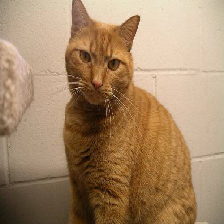

In [15]:
testimg=p.load_img('./myimg/test.jpg',target_size=(224,224))
testimg

In [17]:
imgarr = p.img_to_array(testimg)
imgarr.reshape(1,224,224,3)

array([[[[142., 129., 112.],
         [150., 137., 120.],
         [151., 138., 119.],
         ...,
         [191., 179., 155.],
         [194., 176., 156.],
         [192., 174., 154.]],

        [[146., 133., 116.],
         [147., 134., 117.],
         [142., 129., 110.],
         ...,
         [192., 180., 156.],
         [193., 178., 157.],
         [191., 176., 155.]],

        [[146., 133., 116.],
         [155., 142., 125.],
         [156., 143., 124.],
         ...,
         [190., 178., 154.],
         [188., 178., 153.],
         [186., 176., 151.]],

        ...,

        [[ 27.,  22.,  16.],
         [ 28.,  24.,  13.],
         [ 29.,  26.,  11.],
         ...,
         [131., 118., 101.],
         [118., 113.,  91.],
         [121., 116.,  94.]],

        [[ 26.,  21.,  15.],
         [ 27.,  23.,  12.],
         [ 28.,  25.,  10.],
         ...,
         [129., 116.,  99.],
         [119., 114.,  92.],
         [119., 114.,  92.]],

        [[ 25.,  20.,  14.],
       

In [19]:
pred = modelvgg16.predict(preprocess_input(imgarr.reshape(1,224,224,3)))

1/1 [==============================] - 0s 15ms/step


In [22]:
decode_predictions(pred)

[[('n02124075', 'Egyptian_cat', 0.5447778),
  ('n02123159', 'tiger_cat', 0.27495956),
  ('n02127052', 'lynx', 0.09648224),
  ('n02123045', 'tabby', 0.05835709),
  ('n02123597', 'Siamese_cat', 0.008244284)]]

In [23]:
testimg=p.load_img('mug.jpg',target_size=(224,224))
testimg

imgarr = p.img_to_array(testimg)
imgarr.reshape(1,224,224,3)

pred = modelvgg16.predict(preprocess_input(imgarr.reshape(1,224,224,3)))

1/1 [==============================] - 0s 17ms/step


In [24]:
decode_predictions(pred)

[[('n03063599', 'coffee_mug', 0.38568643),
  ('n07930864', 'cup', 0.22475466),
  ('n07920052', 'espresso', 0.14784242),
  ('n03297495', 'espresso_maker', 0.044441264),
  ('n03063689', 'coffeepot', 0.036469888)]]